In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
import os
from os.path import join, dirname

In [5]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

In [6]:
import numpy as np

In [7]:
np.random.seed(1)

In [29]:
font_path = join(os.getcwd(), 'fonts', 'RobotoSlab-Regular.ttf')
font = font_manager.FontProperties(fname=font_path)
font.set_size(40)

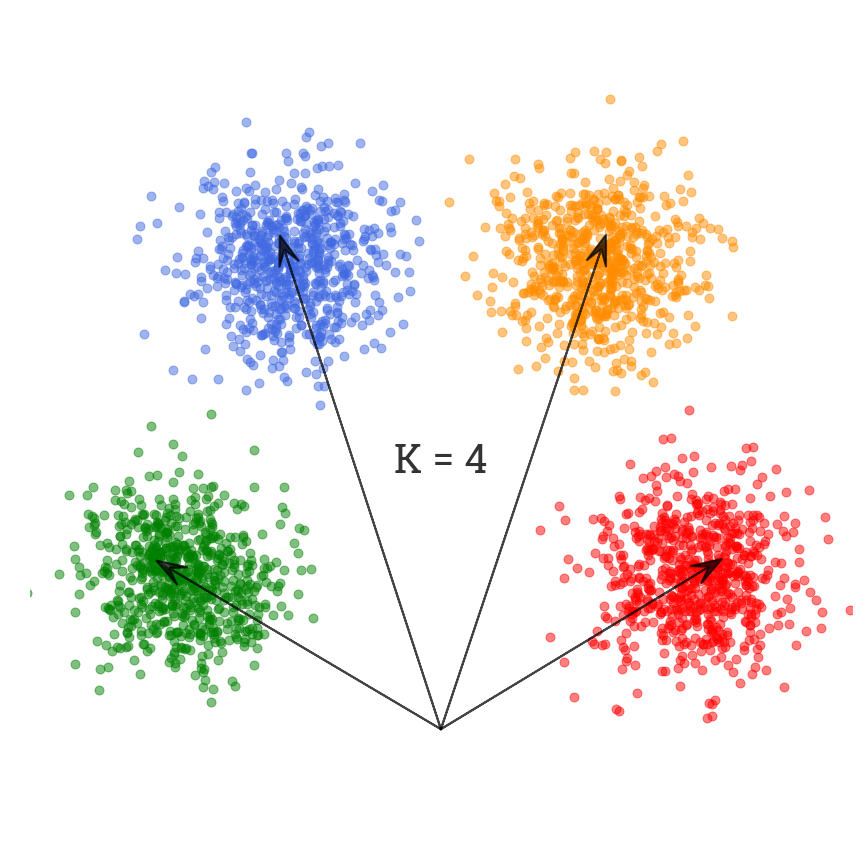

In [143]:
b1, b2, b3, b4 = [np.random.normal(size=(700, 2), scale=0.235) for _ in range(4)]

offset = 1

# Shift blob 1
b1[:, 0] -= 1.25
b1[:, 1] += 0.25 + offset

# Shift blob 2
b2[:, 0] -= 0.75
b2[:, 1] += 1.75 + offset

# Shift blob 3
b3[:, 0] += 0.75
b3[:, 1] += 1.75 + offset

# Shift blob 4
b4[:, 0] += 1.25
b4[:, 1] += 0.25 + offset


f = plt.figure(figsize=(12, 12))
ax = f.add_subplot(111, aspect='equal')
ax.set_xlim(-2, 2)
ax.set_ylim(0, 4.0)

colors = ['green', 'royalblue', 'darkorange', 'red']
shift = 0.5
for i, blob in enumerate((b1, b2, b3, b4)):
    ax.scatter(blob[:, 0], blob[:, 1], s=80, alpha=0.5, color=colors[i])
    x, y = blob.mean(axis=0)    
    ax.arrow(0, shift, x, y - shift, color='black', alpha=0.7, overhang=0.5, head_width=0.1, lw=2)
ax.annotate(s="K = 4", color='black', alpha=0.8, xy=(0, 1.75), fontproperties=font, ha='center')
ax.set_axis_off()
f.tight_layout()

In [144]:
f.savefig('kmeans.png', transparent=False)

In [52]:
from kmeans import kmeans, read_csv, inertia
from plots import palette

In [9]:
data_path = join(os.getcwd(), 'datasets', 'blobs.csv')

In [10]:
X, _ = read_csv(data_path)

In [78]:
b1, b2, b3, b4 = [np.random.normal(size=(700, 2), scale=0.235) for _ in range(4)]

b1[:, 0] -= 1
b1[:, 1] += 1

b2[:, 0] += 1
b2[:, 1] += 1

b3[:, 0] += 1
b3[:, 1] -= 1

b4[:, 0] -= 1
b4[:, 1] -= 1

b5 = np.random.normal(size=(700, 2), scale=0.3)
X = np.r_[b1, b2, b3, b4, b5]
np.random.shuffle(X)

In [79]:
_, _, history = kmeans(X, n_clusters=5, history=True)

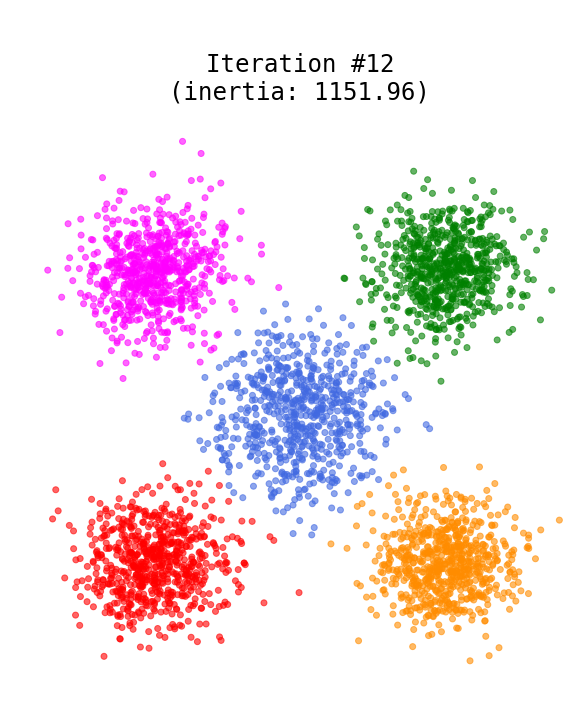

In [98]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, aspect='equal')

get_color = palette()

# font_path = join(os.getcwd(), 'fonts', 'RobotoSlab-Light.ttf')
# font = font_manager.FontProperties(fname=font_path)
# font.set_size(30)

font = font_manager.FontProperties()
font.set_family('monospace')
font.set_weight('light')
font.set_size(24)

import string

# plt.subplots_adjust(left=0.0, right=1.0, top=1.0, bottom=0.0)

for i, (labels, centroids) in enumerate(history, 1):
    score = inertia(X, labels, centroids)
    title = 'Iteration #%02d\n(inertia: %2.2f)' % (i, score)
    colors = [get_color(l) for l in labels]
    letter = string.ascii_letters[i]
    
    ax.clear()
    ax.set_ylim(-2, 3)
    ax.set_xlim(-2, 2)
    ax.set_axis_off()
    ax.scatter(X[:, 0], X[:, 1], c=colors, alpha=0.6)
    ax.annotate(title, xy=(0, 2.5), ha='center', va='center', fontproperties=font)
    fig.tight_layout()
    fig.savefig('iter%s.png' % letter, transparent=False)